# Load dependencies

In [2]:
!pip install plotly


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#general
import io

#data
import numpy as np
import pandas as pd

#machinelearning
import keras

#visualization
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

In [5]:
chicago_taxi_dataset.head(10)

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.00,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.00,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.00,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.00,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.00,0.0,0.0,0.0,10.00,Cash,Flash Cab
5,05/17/2022 5:30:00 PM,05/17/2022 6:00:00 PM,17.50,1251,1.38,4.0,1.703108e+10,1.703128e+10,8.0,28.0,11.00,3.00,27.3,0.0,0.0,14.50,Credit Card,Flash Cab
6,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1813,2.00,4.0,1.703108e+10,1.703128e+10,8.0,28.0,14.50,0.00,0.0,0.0,0.0,14.50,Cash,Sun Taxi
7,05/17/2022 5:30:00 PM,05/17/2022 6:00:00 PM,17.50,1857,2.05,4.0,1.703108e+10,1.703128e+10,8.0,28.0,14.75,4.19,25.8,0.0,1.5,20.94,Credit Card,Sun Taxi
8,05/17/2022 7:00:00 PM,05/17/2022 7:00:00 PM,19.00,787,0.87,4.0,1.703108e+10,1.703108e+10,8.0,8.0,8.00,0.00,0.0,0.0,1.5,9.50,Cash,City Service
9,05/16/2022 6:30:00 PM,05/16/2022 6:45:00 PM,18.50,1399,1.55,4.0,NaN,NaN,32.0,6.0,17.88,4.11,23.0,0.0,0.0,21.99,Mobile,Flash Cab


In [6]:
training_dataSet = chicago_taxi_dataset[['TRIP_MILES','TRIP_SECONDS','FARE','TIP_RATE','PAYMENT_TYPE','COMPANY']]

In [7]:
training_dataSet.head()

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE,PAYMENT_TYPE,COMPANY
0,2.57,2341,31.99,6.3,Mobile,Flash Cab
1,1.18,1074,9.75,27.9,Credit Card,Flash Cab
2,1.29,1173,10.25,0.0,Cash,Sun Taxi
3,3.70,3360,23.75,0.0,Cash,Choice Taxi Association
4,1.15,1044,10.00,0.0,Cash,Flash Cab


In [8]:
training_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRIP_MILES    31694 non-null  float64
 1   TRIP_SECONDS  31694 non-null  int64  
 2   FARE          31694 non-null  float64
 3   TIP_RATE      31694 non-null  float64
 4   PAYMENT_TYPE  31694 non-null  object 
 5   COMPANY       31694 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.5+ MB


In [11]:
training_dataSet.describe(include="all")

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE,PAYMENT_TYPE,COMPANY
count,31694.000000,31694.000000,31694.000000,31694.000000,31694,31694
unique,NaN,NaN,NaN,NaN,7,31
top,NaN,NaN,NaN,NaN,Credit Card,Flash Cab
freq,NaN,NaN,NaN,NaN,14142,7887
mean,8.289463,1319.796397,23.905210,12.965785,NaN,NaN
std,7.265672,928.932873,16.970022,15.517765,NaN,NaN
min,0.500000,60.000000,3.250000,0.000000,NaN,NaN
25%,1.720000,548.000000,9.000000,0.000000,NaN,NaN
50%,5.920000,1081.000000,18.750000,12.200000,NaN,NaN
75%,14.500000,1888.000000,38.750000,20.800000,NaN,NaN


In [13]:
max_fare = training_dataSet['FARE'].max()
print("the maximum fare? \t\t\t Answer: ${fare:.2f}".format(fare=max_fare))

the maximum fare? 			 Answer: $159.25


In [17]:
mean_distance = training_dataSet['TRIP_MILES'].mean()
print("the mean distance?\t\t\t Answer:{meandis:.2f}".format(meandis=mean_distance))

the mean distance?			 Answer:8.29


In [18]:
num_unique_companies = training_dataSet['COMPANY'].nunique()
print("the number of unique comapnies?\t\t\t Answer:{number:.2f}".format(number=num_unique_companies))

the number of unique comapnies?			 Answer:31.00


In [20]:
most_freq_payment_type = training_dataSet['PAYMENT_TYPE'].value_counts().idxmax()
print("What is the most frequent payment type? \t\tAnswer: {type}".format(type = most_freq_payment_type))

What is the most frequent payment type? 		Answer: Credit Card


In [24]:
missing_values = training_dataSet.isnull().sum().sum()
print("Are any features missing data? \t\t\t\tAnswer:", "No" if missing_values == 0 else "Yes")

Are any features missing data? 				Answer: No


In [25]:
training_dataSet.corr(numeric_only=True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


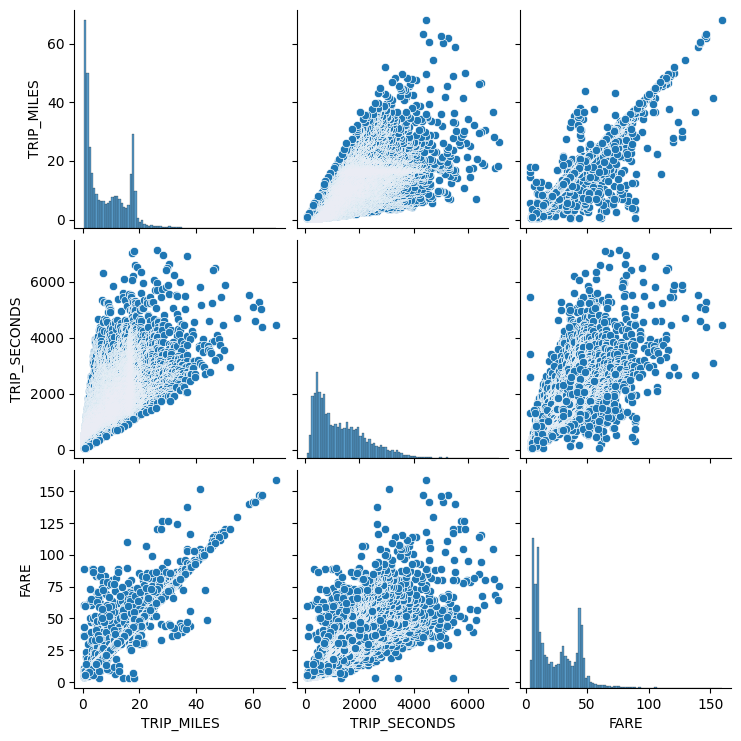

In [26]:
sns.pairplot(training_dataSet,x_vars=['TRIP_MILES','TRIP_SECONDS','FARE'],y_vars=['TRIP_MILES','TRIP_SECONDS','FARE'])

In [27]:
#@title Define plotting functions

def make_plots(df, feature_names, label_name, model_output, sample_size=200):

  random_sample = df.sample(n=sample_size).copy()
  random_sample.reset_index()
  weights, bias, epochs, rmse = model_output

  is_2d_plot = len(feature_names) == 1
  model_plot_type = "scatter" if is_2d_plot else "surface"
  fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])

  plot_data(random_sample, feature_names, label_name, fig)
  plot_model(random_sample, feature_names, weights, bias, fig)
  plot_loss_curve(epochs, rmse, fig)

  fig.show()
  return

def plot_loss_curve(epochs, rmse, fig):
  curve = px.line(x=epochs, y=rmse)
  curve.update_traces(line_color='#ff0000', line_width=3)

  fig.append_trace(curve.data[0], row=1, col=1)
  fig.update_xaxes(title_text="Epoch", row=1, col=1)
  fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

  return

def plot_data(df, features, label, fig):
  if len(features) == 1:
    scatter = px.scatter(df, x=features[0], y=label)
  else:
    scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

  fig.append_trace(scatter.data[0], row=1, col=2)
  if len(features) == 1:
    fig.update_xaxes(title_text=features[0], row=1, col=2)
    fig.update_yaxes(title_text=label, row=1, col=2)
  else:
    fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

  return

def plot_model(df, features, weights, bias, fig):
  df['FARE_PREDICTED'] = bias[0]

  for index, feature in enumerate(features):
    df['FARE_PREDICTED'] = df['FARE_PREDICTED'] + weights[index][0] * df[feature]

  if len(features) == 1:
    model = px.line(df, x=features[0], y='FARE_PREDICTED')
    model.update_traces(line_color='#ff0000', line_width=3)
  else:
    z_name, y_name = "FARE_PREDICTED", features[1]
    z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
    y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
    x = []
    for i in range(len(y)):
      x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

    plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

    light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
    model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

  fig.add_trace(model.data[0], row=1, col=2)

  return

def model_info(feature_names, label_name, model_output):
  weights = model_output[0]
  bias = model_output[1]

  nl = "\n"
  header = "-" * 80
  banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header

  info = ""
  equation = label_name + " = "

  for index, feature in enumerate(feature_names):
    info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
    equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

  info = info + "Bias: {:.3f}\n".format(bias[0])
  equation = equation + "{:.3f}\n".format(bias[0])

  return banner + nl + info + nl + equation

print("SUCCESS: defining plotting functions complete.")

SUCCESS: defining plotting functions complete.


In [28]:
#@title Code - Define ML functions

def build_model(my_learning_rate, num_features):
  """Create and compile a simple linear regression model."""
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  inputs = keras.Input(shape=(num_features,))
  outputs = keras.layers.Dense(units=1)(inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, features, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  history = model.fit(x=features,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):

  print('INFO: starting training experiment with features={} and label={}\n'.format(feature_names, label_name))

  num_features = len(feature_names)

  features = df.loc[:, feature_names].values
  label = df[label_name].values

  model = build_model(learning_rate, num_features)
  model_output = train_model(model, features, label, epochs, batch_size)

  print('\nSUCCESS: training experiment complete\n')
  print('{}'.format(model_info(feature_names, label_name, model_output)))
  make_plots(df, feature_names, label_name, model_output)

  return model

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


INFO: starting training experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - loss: 180.8011 - root_mean_squared_error: 13.4147
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - loss: 51.4541 - root_mean_squared_error: 7.1384
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 20.2679 - root_mean_squared_error: 4.4992
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 17.7844 - root_mean_squared_error: 4.2132
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - loss: 16.4919 - root_mean_squared_error: 4.0587
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - loss: 16.1580 - root_mean_squared_error: 4.0173
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 14.6946 - root_mean_squared_error: 3.8253
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 15.0702 - root_mean_squared_error: 3.8739
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 13.7560 - root_mean_squa

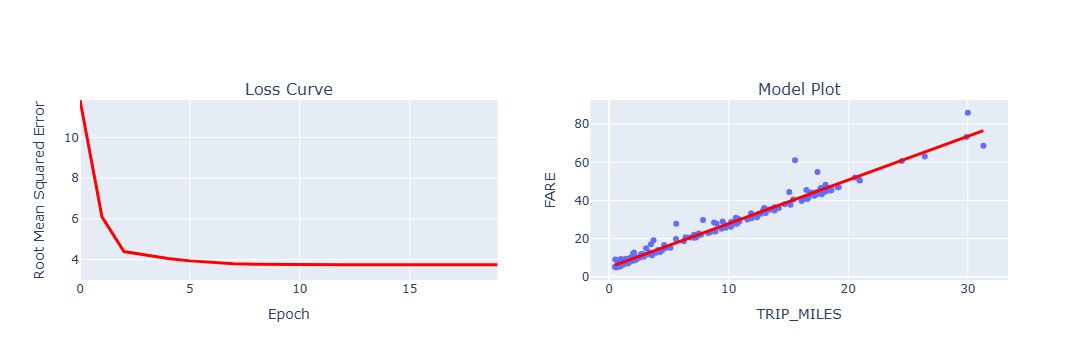

In [29]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

# Specify the feature and the label.
features = ['TRIP_MILES']
label = 'FARE'

model_1 = run_experiment(training_dataSet, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['TRIP_MILES', 'TRIP_MINUTES'] and label=FARE

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - loss: 1470.1692 - root_mean_squared_error: 38.1981
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 258.4948 - root_mean_squared_error: 15.8828
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 28.4146 - root_mean_squared_error: 5.3233
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - loss: 18.3071 - root_mean_squared_error: 4.2765
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 13.1896 - root_mean_squared_error: 3.6278
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 12.3221 - root_mean_squared_error: 3.5065
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - loss: 13.1294 - root_mean_squared_error: 3.6124
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - loss: 12.9046 - root_mean_squared_error: 3.5823
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 12.52

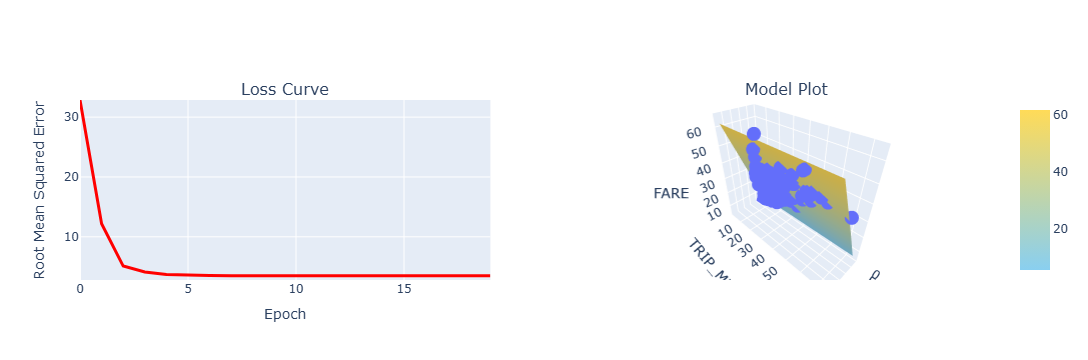

In [33]:
#@title Code - Experiment 3

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

training_dataSet.loc[:, 'TRIP_MINUTES'] = training_dataSet['TRIP_SECONDS']/60

features = ['TRIP_MILES', 'TRIP_MINUTES']
label = 'FARE'

model_2 = run_experiment(training_dataSet, features, label, learning_rate, epochs, batch_size)

In [34]:
#@title Code - Define functions to make predictions
def format_currency(x):
  return "${:.2f}".format(x)

def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.set_index(np.arange(batch_size), inplace=True)
  return batch

def predict_fare(model, df, features, label, batch_size=50):
  batch = build_batch(df, batch_size)
  predicted_values = model.predict_on_batch(x=batch.loc[:, features].values)

  data = {"PREDICTED_FARE": [], "OBSERVED_FARE": [], "L1_LOSS": [],
          features[0]: [], features[1]: []}
  for i in range(batch_size):
    predicted = predicted_values[i][0]
    observed = batch.at[i, label]
    data["PREDICTED_FARE"].append(format_currency(predicted))
    data["OBSERVED_FARE"].append(format_currency(observed))
    data["L1_LOSS"].append(format_currency(abs(observed - predicted)))
    data[features[0]].append(batch.at[i, features[0]])
    data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))

  output_df = pd.DataFrame(data)
  return output_df

def show_predictions(output):
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

In [36]:
#@title Code - Make predictions

output = predict_fare(model_2, training_dataSet, features, label)
show_predictions(output)

--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_FARE OBSERVED_FARE L1_LOSS  TRIP_MILES TRIP_MINUTES
0          $14.49        $14.25   $0.24        4.10        16.00
1          $48.18        $44.50   $3.68       17.75        56.65
2          $10.39        $10.50   $0.11        2.30        13.00
3          $63.69        $62.25   $1.44       23.94        76.65
4          $40.35        $40.25   $0.10       16.30        23.00
5          $12.66        $12.25   $0.41        3.18        16.27
6           $8.79         $8.50   $0.29        1.80         9.00
7           $8.78         $9.87   $1.09        1.80         8.92
8          $35.98        $36.00   $0.02       13.67        29.78
9          $10.66        $10.48   $0.18        2.61        10.48
10          $6.95         $6.50   $0.45   